In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import hdbscan

%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha': 0.5, 's': 80, 'linewidths': 0}

In [2]:
test_data = pd.read_csv('city_crimes.csv', encoding='Latin-1') 
test_data.head()

,CATEGORY,DATE,QUARTER,PDQ,X,Y,LONGITUDE,LATITUDE
0,Vol dans / sur véhicule à moteur,1/2/2019,jour,21,300632.000,5041020.000,-73.553342,45.509088
1,Méfait,1/3/2019,soir,13,297410.969,5032345.500,-73.594434,45.431004
2,Introduction,1/4/2019,soir,22,300112.090,5043643.099,-73.560021,45.532688
3,Vol dans / sur véhicule à moteur,1/6/2019,soir,3,271931.375,5035762.000,-73.920293,45.461013
4,Introduction,1/7/2019,jour,7,288836.977,5039722.907,-73.704251,45.497246


In [3]:
test_data = test_data.iloc[:,[4,5]].values

In [4]:
test_data

array([[ 300632.    , 5041020.    ],
       [ 297410.969 , 5032345.5   ],
       [ 300112.09  , 5043643.099 ],
       [ 271931.375 , 5035762.    ],
       [ 288836.977 , 5039722.907 ],
       [ 300114.626 , 5040911.071 ],
       [ 294746.899 , 5043433.826 ],
       [ 299253.511 , 5041756.077 ],
       [ 281130.124 , 5037899.465 ],
       [ 289019.485 , 5039926.665 ],
       [ 293962.195 , 5043606.323 ],
       [ 292278.632 , 5035605.691 ],
       [ 298915.736 , 5040361.061 ],
       [ 293609.938 , 5034174.    ],
       [ 303421.793 , 5051673.423 ],
       [ 298998.414 , 5041640.075 ],
       [ 299068.29  , 5047159.442 ],
       [ 294536.122 , 5044338.402 ],
       [ 291217.962 , 5042354.303 ],
       [ 295502.145 , 5033498.464 ],
       [ 299107.583 , 5045005.02  ],
       [ 299702.811 , 5041778.579 ],
       [ 300732.881 , 5050430.477 ],
       [ 293635.41  , 5036479.938 ],
       [ 298080.2968, 5042832.373 ],
       [ 299754.357 , 5047916.324 ],
       [ 294815.698 , 5045368.064 ],
 

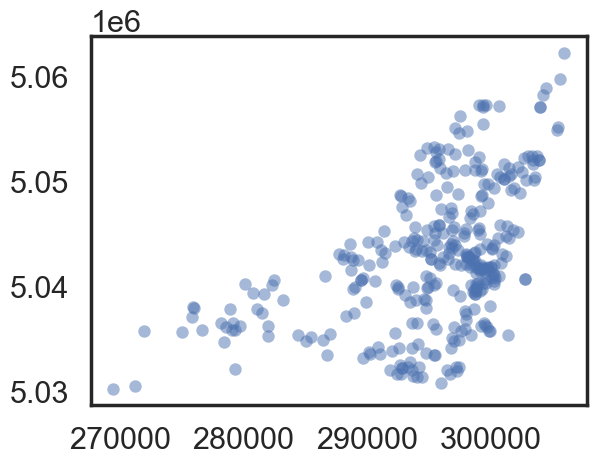

In [5]:
plt.scatter(test_data[:,0], test_data[:,1], color='b', **plot_kwds)

In [6]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=9, gen_min_span_tree=True)
clusterer.fit(test_data)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=9)

<Axes: >

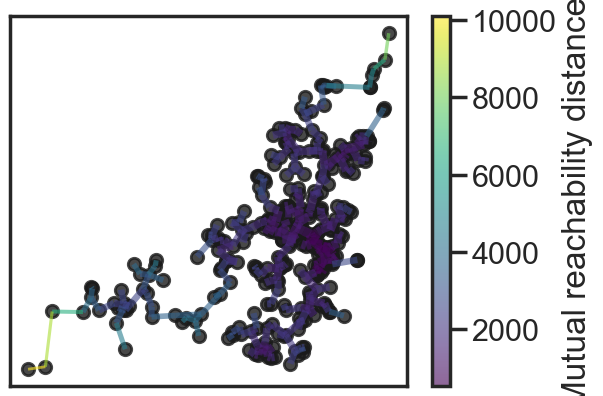

In [7]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

<Axes: ylabel='$\\lambda$ value'>

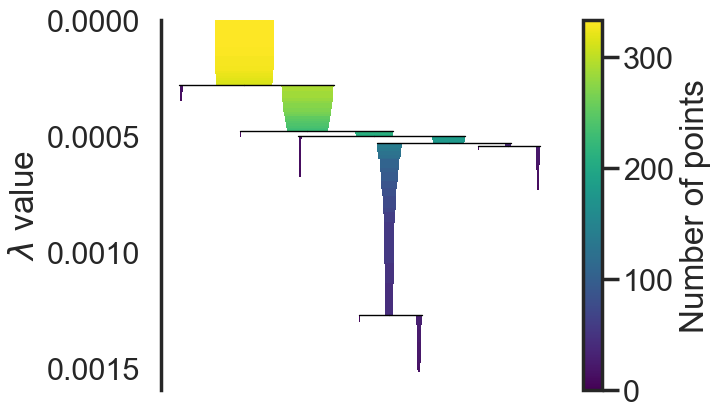

In [8]:
clusterer.condensed_tree_.plot()

<Axes: ylabel='$\\lambda$ value'>

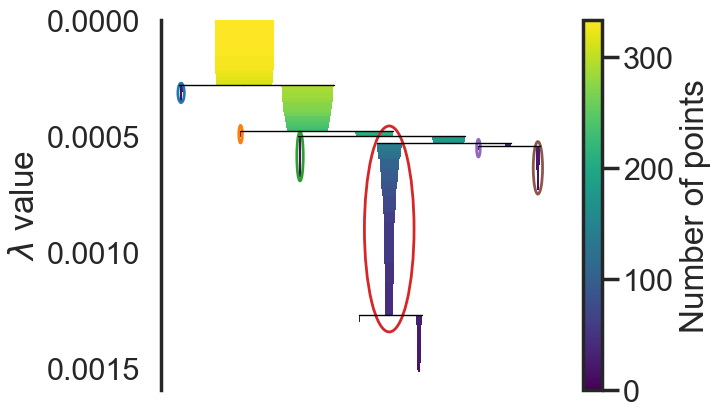

In [9]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

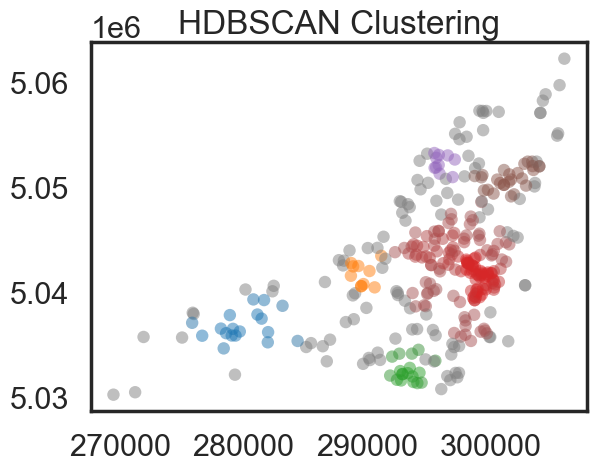

In [10]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)
plt.title("HDBSCAN Clustering")
plt.show()